# Decision Tree Classification Model

Nama : Kevin Darmawan
NPM : 1806148744

Pada notebook ini, akan dilakukan implementasi decision tree clasification model menggunakan dataset Iris
 
Decision tree adalah salah satu metode klasifikasi yang paling populer, karena mudah untuk diinterpretasi oleh manusia. Decision tree adalah model prediksi menggunakan struktur pohon atau struktur berhirarki.

Konsep dari pohon keputusan adalah mengubah data menjadi decision tree dan aturan-aturan keputusan. Manfaat utama dari penggunaan decision tree adalah kemampuannya untuk mem-break down proses pengambilan keputusan klasifikas yang kompleks menjadi lebih simple, sehingga hasil klasifikasi menginterpretasikan solusi dari permasalahan.

In [1]:
# mengimport data dari iris csv
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Split training dan testing data
Pembagian data training dan testing dengan rasio 70-30 dan rincian:

a. Data training = 35 data pertama dari setiap kelas → total 105 data training

b. Data testing = 15 data terakhir dari setiap kelas → total 45 data testing

In [ ]:
# Randomize tiap class
setosa = data.loc[0:50]
versicolor = data.loc[50:100]
virginica = data.loc[100:150]

setosa_shuffled=setosa.sample(frac=1).reset_index(drop=True)
versicolor_shuffled=versicolor.sample(frac=1).reset_index(drop=True)
virginica_shuffled=virginica.sample(frac=1).reset_index(drop=True)

# Gabungkan kembali
data = pd.concat([setosa_shuffled, versicolor_shuffled, virginica_shuffled])
data.head()

In [2]:
# Split training data sesuai requirement
X_train = data.loc[np.r_[0:35, 50:85, 100:135], ['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train = data.loc[np.r_[0:35, 50:85, 100:135], ['Species']]
                   
X_test = data.loc[np.r_[35:50, 85:100, 135:150], ['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test = data.loc[np.r_[35:50, 85:100, 135:150], ['Species']]

## Percobaan 1
Accuracy score dengan default hyperparameter criterion : 'gini'

In [8]:
# Create Decision Tree classifer object
tree_1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
tree_1.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
#Predict the response for test dataset
y_pred = tree_1.predict(X_test)

In [49]:
X = data.iloc[:,1:5]
y = data.iloc[:,5]

In [29]:
from sklearn.metrics import accuracy_score
print('Accuracy score training data (dengan default criterions gini) : ', accuracy_score(y_true = y_train, y_pred = clf.predict(X_train)))
print('Accuracy score test data (dengan default criterions gini) : ', accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy score training data (dengan default criterions gini) :  1.0
Accuracy score test data (dengan default criterions gini) :  1.0


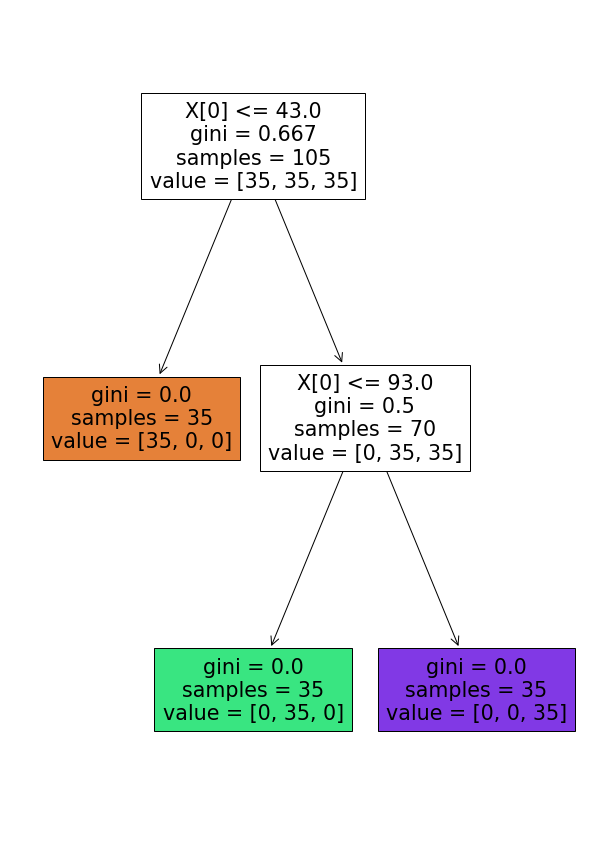

In [40]:
fig = plt.figure(figsize=(10,15))
_ = tree.plot_tree(tree_1, filled=True)

## Percobaan 2
Tuning hyperparameter menggunakan criterion gini dengan hyperparam lain variasi

In [31]:
tree_2 = DecisionTreeClassifier(criterion="gini", max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=15, max_features=3, min_weight_fraction_leaf=0.0, random_state=None)
tree_2.fit(X_train, y_train)
y_pred = tree_2.predict(X_test)
print('Accuracy score training data 2: ', accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy score training data 2:  0.8444444444444444


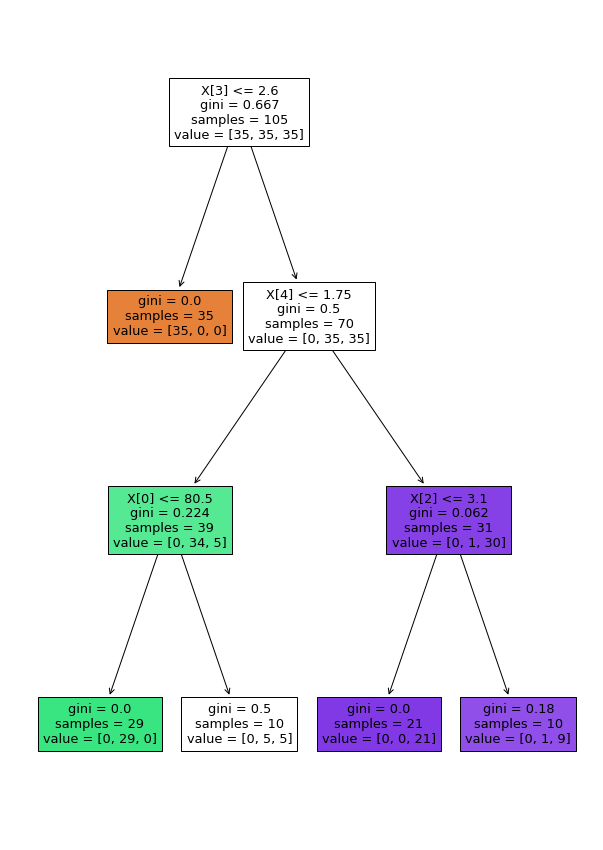

In [28]:
fig = plt.figure(figsize=(10,15))
_ = tree.plot_tree(tree_2, filled=True)

## Percobaan 3
Tuning hyperparameter menggunakan criterion berbeda dengan hyperparam sama seperti percobaan 2

In [33]:
tree_3 = DecisionTreeClassifier(criterion="entropy", max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=30, max_features=3, min_weight_fraction_leaf=0.1, random_state=None)
tree_3.fit(X_train, y_train)
y_pred = tree_3.predict(X_test)
print('Accuracy score training data 3 : ', accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy score training data 3 :  0.9777777777777777


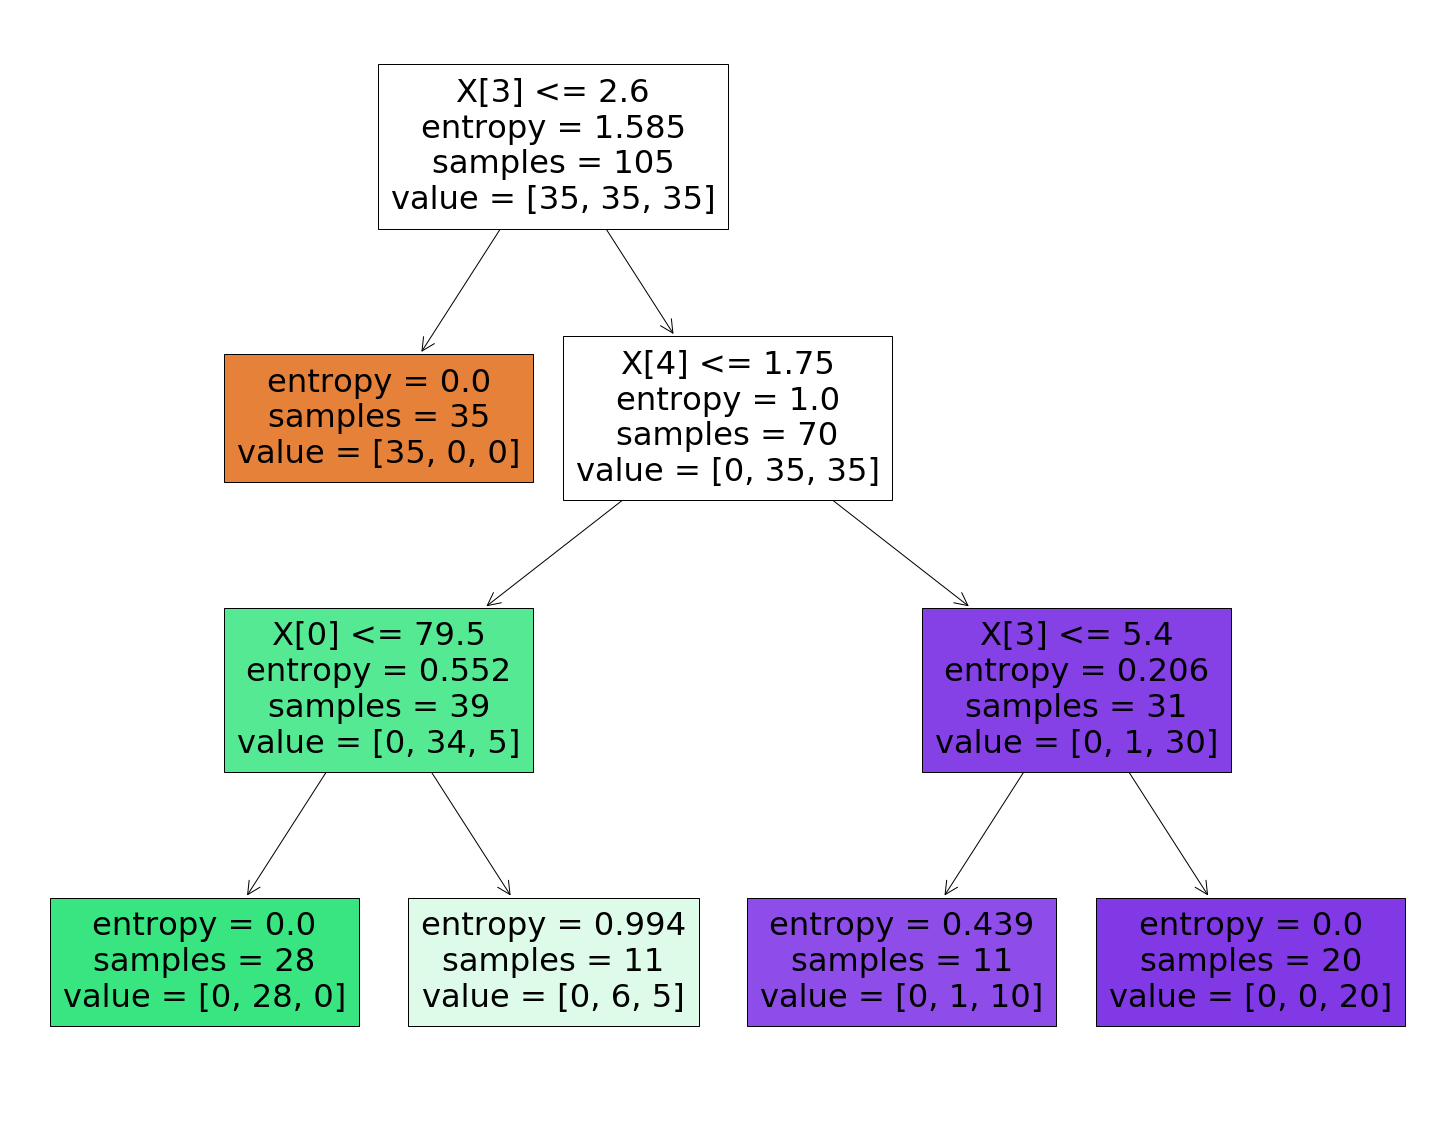

In [26]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_3, filled=True)

## Kesimpulan
Karena data tidak di random dan variasi Hyperparameter dilakukan secara manual (tidak di tuning dengan ANN seperti RandomizedSearchCV dan GridSearchCV) maka meningkatnya akurasi hanya sebatas faktor kebetulan saja. 

Selain itu untuk variasi pemilihan jumlah feature yang dimasukkan pada decision tree akan memberikan akurasi yang berbeda untuk setiap kali dijalankan. Namun untuk kasus ini criterion "gini" memiliki akurasi yang lebih baik daripada "entropy"